# CS3237 Lab 4 - Neural Networks and Deep Learning

**Name: Javon Teo Tze Kai**

**Student Number: A0233706J**

**Lab Group: B02**


## 1. Introduction

The objectives of this lab are:

    1. To familiarize you with how to encode input and output vectors for neural networks.
    2. To give you some insight into how hyperparameters like learning rate and momentum affect training.
    3. To create, test and train, a CNN deep learning model using the MNIST dataset.
    
To save time we will train each experiment only for 10 epochs. This will lead to less than optimal results but is enough for you to make observations.

## 2. The Irises Dataset

We will now work again on the Irises Dataset, which we used in Lab 3, for classifying iris flowers into one of three possible types. As before we will consider four factors:

    1. Sepal length in cm
    2. Sepal width in cm
    3. Petal length in cm
    4. Petal width in cm

In this dataset there are 150 sample points. The code below loads the dataset and prints the first 10 rows so we have an idea of what it looks like.

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

iris = load_iris()

print("First 10 rows of data:")
print(iris.data[:10])

First 10 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 2.2 Scaling the Data

We make use of the MinMaxScaler to scale the inputs to between 0 and 1.  The code below does this and prints the first 10 rows again, to show us the difference.

In the next section we will investigate what happens if we use unscaled data.

In [2]:
scaler = MinMaxScaler()
scaler.fit(iris.data)
X = scaler.transform(iris.data)
Y = iris.target

print("First 10 rows of SCALED data.")
print(X[:10])

First 10 rows of SCALED data.
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


### 2.3 Encoding the Targets

In Lab 3 we saw that the target values (type of iris flower) is a vector from 0 to 2. We can see the 150 labels below:


In [3]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We can use this to train the neural network, but we will use "one-hot" encoding, where we have a vector of _n_ integers consisting of 0's and 1's.  The table below shows how one-hot encoding works:

|   Value    |    One-Hot Encoding    |
|:----------:|:----------------------:|
| 0 | \[1 0 0\] |
| 1 | \[0 1 0\] |
| 2 | \[0 0 1\] |

Pytorch provides the one_hot function to create one-hot vectors:



In [4]:
import torch
import torch.nn.functional as F

print(F.one_hot(torch.tensor(iris.target), 3))

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 

Now let's split the data into training and testing data:



In [5]:
from torch.utils.data import TensorDataset, DataLoader

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 1)
train_x = torch.Tensor(train_x)
train_y = F.one_hot(torch.tensor(train_y), 3).to(torch.float32)

test_x = torch.Tensor(test_x)
test_y = F.one_hot(torch.tensor(test_y), 3).to(torch.float32)

train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

train_loader = DataLoader(train_dataset)
test_loader = DataLoader(test_dataset)

### 2.4 Building our Neural Network

Let's now begin building a simple neural network with a single hidden layer, using the Stochastic Gradient Descent (SGD) optimizer, ReLu transfer functions for the hidden layer and softmax for the output layer.

The code to do this is shown below:

In [6]:
import torch.nn as nn
import torch.optim as optim

class ModelNN(nn.Module):
    def __init__(self):
        super(ModelNN, self).__init__()
        self.l1 = nn.Linear(4, 100)
        self.l2 = nn.Linear(100, 3)
    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        output = self.l2(x)
        return output

model = ModelNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1, momentum = 0.001)

### 2.5 Training the Neural Network

As is usually the case, we can call the "fit" method to train the neural network for 10 epochs. You can increase this to a larger value if you want.

In [7]:
# Train the Model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for input, labels in train_loader:
        outputs = model(input)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += input.size(dim = 0)
        correct += (predicted == label).sum().item()
    print(f'Training accuracy of the model: {100 * correct / total} %')

with torch.no_grad():
    correct = 0
    total = 0
    i = 0
    for input, labels in test_loader:
        outputs = model(input)
        _, predicted = torch.max(outputs.data, 1)
        _, label = torch.max(labels, 1)
        total += input.size(dim = 0)
        correct += (predicted == label).sum().item()
    print(f'Test accuracy of the model: {100 * correct / total} %')

Epoch [5/10], Loss: 0.0071
Epoch [10/10], Loss: 0.0025
Training complete!
Training accuracy of the model: 89.16666666666667 %
Test accuracy of the model: 93.33333333333333 %


---
#### Question 1

Run the code above. Do you see evidence of underfitting? Overfitting? Justify your answers. ***(4 MARKS)***

**Answer: There is no evidence of underfitting or overfitting, because the training (93.3%) and test accuracy (100.0%) are about the same, and they also quite accurate in predicting the model. There is no evidence of overfitting, because the test accuracy is larger than the training accuracy.**

_(For TA) Marks awarded: ____ / 4_

---

#### Question 2a

Consult the documentation for the SGD optimizer [here](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html). What does the lr parameter do? ***(1 MARK)***

**Answer: The lr parameter influences how quickly the weights of the model are adjusted at each step.**

#### Question 2b

The momentum parameter "accelerates gradient descent in the relevant direction and dampens oscillations". Using Google or other means, illustrate what this means. ***(2 MARKS)***

**Answer: The momentum parameter smoothens the gradient descent process by accumulating past gradients, helping gradient descent to move consistently in the same direction. From the image found by Google:
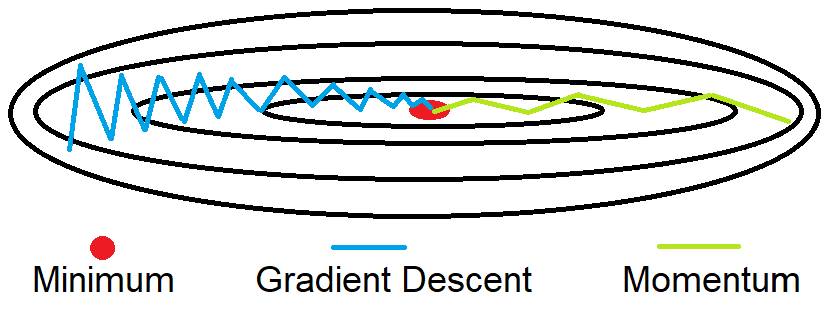, when the momentum parameter is 0 (blue line), the gradient descent is not smooth, while when there is momentum (yellow line), the gradient descent is smoother.**

_(For TA) Marks awarded: ____ / 3_

----

#### Question 3a

We will now play with the lr parameter. Adjust the lr parameter to the following values and record the final training and test accuracies in the respective columns. Also observe the sequence of accuracies over the training period, and place your observation in the "remarks" column, e.g. "Progresses steadily", "some oscillation" etc. ***(3 MARKS)***

**Answer: Fill the table below **

|  lr    | Training Acc. | Testing    Acc. |      Remarks      |
|:------:|---------------|-----------------|-------------------|
|0.01    |    93.33%     |    93.33%       |                   |
|0.1     |    88.33%     |    93.33%       |                   |
|1.0     |    69.17%     |    56.67%       |                   |
|10.0    |    32.50%     |    36.67%       |                   |
|100     |    32.50%     |    36.67%       |                   |
|1000    |    32.50%     |    36.67%       |                   |
|10000   |    32.50%     |    36.67%       |                   |
|100000  |    32.50%     |    36.67%       |                   |


#### Question 3b

Based on your observations above, comment on the effect of small and very large learning rates on the learning. ***(2 MARKS)***

**Answer: When the learning rate is small and not optimal, it leads to slow convergence and this may give a bad training and testing accuracy if the number of epochs is small. When the learning rate is very large, it may overshoot or oscillate around the optimal solution and hence also give bad training and testing accuracy.**

_(For TA) Marks awarded: ____ / 5_

### 2.5 Using Momentum

We will now experiment with the momentum term. To do this:

    1. Change the learning rate to 0.1.
    2. Set the momentum to 0.1. 
    
Run your neural network.

---

#### Question 4a

Keeping the learning rate at 0.1, complete the table below using the momentum values shown. Again record any observations in the "Remarks" column. ***(3 MARKS)***

**Answer: Fill the table below**

| momentum | Training Acc. | Testing    Acc. |      Remarks      |
|:--------:|---------------|-----------------|-------------------|
|0.001     |     89.17%    |     93.33%      |                   |
|0.01      |     88.33%    |     93.33%      |                   |
|0.1       |     85.83%    |     90.00%      |                   |
|1.0       |     30.83%    |     43.33%      |                   |

#### Question 4b

Based on your observations above, does the momentum term help in learning? ***(2 MARKS)***

**Answer: The momentum term may help in learning, but this depends on its value. If it is too high, it may overshoot the optimal solution.**

_(For TA) Marks awarded: ____ / 5_

---


----
## 4. Creating a CNN for the MNIST Dataset

In this section we will now create a convolutional neural network (CNN) to classify images in the MNIST dataset that we used in Lecture 5. Let's build each part step by step.

### 4.1 Loading the MNIST Dataset

As in the Neural Network example from Lecture 5 we will load the MNIST dataset, scale the inputs to between 0 and 1, and convert the Y labels to one-hot vectors. However unlike before we will not flatten the 28x28 image to a 784 element vector, since CNNs can inherently handle 2D data. We will use a batch size of 1 for now, you may want to try other values for your training.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

batch_size = 1

# Load the data, and normalise it.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Change target to a one hot vector.
target_transform = transforms.Compose(
    [transforms.Lambda(lambda x: F.one_hot(torch.tensor(x), 10))])

training_set = datasets.MNIST('data', train=True, download=True, transform=transform, target_transform=target_transform)
test_set = datasets.MNIST('data', train=False, transform=transform, target_transform=target_transform)
train_loader = torch.utils.data.DataLoader(training_set, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size)

### 4.2 Create your CNN network

Create your CNN network using pytorch (Hint: you may look at the CNN example from lecture 6). You should minimally have two convolutional layers, two maxpool layers, and at least one dense (linear) layer for the output. Use activation functions between layers such as `relu` or `softmax`. Pay careful attention to the size of the inputs and outputs. 

Write your class in the cell below and implement both the `constructor` and the `forward` function.

In [24]:
"""
    Enter your code for part 4.2 here in this code cell.
"""
class CNNModel(nn.Module):
    def __init__(self):
        # call the parent constructor
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = (5,5))
        self.maxpool1 = nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 100, kernel_size = (5,5))
        self.maxpool2 = nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))
        self.fc1 = nn.Linear(in_features=100, out_features=10) # dense layer to do the classification

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool2(x)
        output = self.fc1(x)
        return output

model = CNNModel()

### 4.3 Train your CNN network

Now train your network on the training dataset. You should train for 50 to 100 epochs.

You will have to decide on which optimizer to use (SGD, adam, for example), which loss function you will use, and any other hyperparameters such as learning rate, batch size, and momentum.

Write your code to train in the cell below.

In [25]:
"""
    Enter your code for part 4.3 here in this code cell.
"""
# define training hyperparameters
lr = 1e-2
num_epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

model.to(device)

for e in range(0, num_epochs):
	# set the model in training mode
	model.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalValLoss = 0
	# initialize the number of correct predictions in the training
	# and validation step
	trainCorrect = 0
	valCorrect = 0
	# loop over the training set
	for i, (x, y) in enumerate(train_loader):
		# send the input to the device
		(x, y) = (x.to(device), y.to(torch.float32).to(device))
		# perform a forward pass and calculate the training loss
		pred = model(x)
		loss = criterion(pred, y)
		# zero out the gradients, perform the backpropagation step,
		# and update the weights
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		# add the loss to the total training loss so far and
		# calculate the number of correct predictions
		totalTrainLoss += loss
	print("Epoch", e, "Training Loss:", totalTrainLoss.item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (400x4 and 100x10)

### 4.4 Test your CNN network

Now test your network on the test dataset. Print out the accuracy of your model. 

Try modifying your model and choosing different hyperparameters and see if you can improve the accuracy of your model. 

Write your code to test in the cell below.

In [11]:
"""
    Enter your code for part 4.4 here in this code cell.
"""

'\n    Enter your code for part 4.4 here in this code cell.\n'

#### Question 5:

Complete the following table with your final design (you may add more rows for the # neurons (layer1) etc. to detail how many neurons you have in each hidden layer). Likewise you may replace the lr, momentum etc rows with parameters more appropriate to the optimizer that you have chosen. (4 MARKS)

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            |             |                       |
| Input shape          |             |                       |
| First layer          |             |                       |
| Second layer         |             |                       |
| Add more layers      |             |                       |
| if needed            |             |                       |
| Dense layer          |             |                       |
| learning rate?       |             |                       |
| momentum?            |             |                       |
| loss function?       |             |                       |

*FOR GRADER:* <br>
*TABLE: _____ / 4* <br>
*CODE: ______ / 10*<br>

***TOTAL: ______ / 14 ***

#### Question 6

What is the final training and test accuracy that you obtained after 100 epochs. Are there signs of underfitting or overfitting? Explain your answer (4 MARKS)

***Write your answer here***

*FOR GRADER: ______ / 4*

----

## 5 Conclusion

In this lab we saw how to create a simple Dense neural network to complete the relatively simple task of learning how to classify irises according to their sepal and petal characteristics. We then tried using a CNN on the MNIST dataset. 

---

***FOR TA ONLY***

| Question |  Marks  |
|:--------:|:-------:|
|1         |     /4  |
|2         |     /3  |
|3         |     /5  |
|4         |     /5  |
|5         |     /14 |
|6         |     /4  |
|Total:    |     /35 |

